In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, ADASYN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_excel('datos.xlsx', skiprows=1)

In [3]:
data

,Unnamed: 0,id,ZONA,LETRA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,NaN,1,1,NaN,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,NaN,2,2,NaN,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,NaN,3,3,NaN,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,NaN,4,4,NaN,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,NaN,5,5,NaN,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,NaN,736,692,NaN,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,NaN,737,693,NaN,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,NaN,738,694,NaN,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN
738,NaN,739,695,NaN,17.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
data = data.drop(data.columns[0], axis=1)

In [5]:
data

,id,ZONA,LETRA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,NaN,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,NaN,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,NaN,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,NaN,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,NaN,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,692,NaN,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,NaN,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,NaN,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN
738,739,695,NaN,17.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    740 non-null    int64  
 1   ZONA                                  740 non-null    int64  
 2   LETRA                                 74 non-null     object 
 3   Distancia al centro (Km)              740 non-null    float64
 4   Comercio                              727 non-null    float64
 5   Educación                             727 non-null    float64
 6   Residencial                           727 non-null    float64
 7   Industrial                            727 non-null    float64
 8   Servicios                             727 non-null    float64
 9   Otros                                 727 non-null    float64
 10  GSE Alto                              739 non-null    float64
 11  GSE Medio Alto     

(               id        ZONA  Distancia al centro (Km)       Comercio  \
 count  740.000000  740.000000                740.000000     727.000000   
 mean   370.500000  351.891892                 11.776142   18466.594223   
 std    213.763888  200.501129                  9.891452   33111.262040   
 min      1.000000    1.000000                  0.000000       0.000000   
 25%    185.750000  180.750000                  6.032500    2777.500000   
 50%    370.500000  356.500000                  9.365000    7607.000000   
 75%    555.250000  525.250000                 14.332500   18821.500000   
 max    740.000000  696.000000                 92.260000  514215.000000   
 
            Educación   Residencial     Industrial      Servicios  \
 count     727.000000  7.270000e+02     727.000000     727.000000   
 mean    10467.211829  1.917261e+05   34666.068776   22456.375516   
 std     16152.050680  1.836400e+05   82211.501045   58145.862739   
 min         0.000000  0.000000e+00       0.000

In [7]:
print(data.isnull().sum())


id                                        0
ZONA                                      0
LETRA                                   666
Distancia al centro (Km)                  0
Comercio                                 13
Educación                                13
Residencial                              13
Industrial                               13
Servicios                                13
Otros                                    13
GSE Alto                                  1
GSE Medio Alto                            1
GSE Medio                                 1
GSE Medio bajo                            1
GSE Bajo                                  1
Ed. Básica y Media                        1
Ed. Superior                              1
Valor de oferta de vivienda (uf/m2)     491
dtype: int64


In [8]:
duplicados = data[data.duplicated()]
print(duplicados)


Empty DataFrame
Columns: [id, ZONA, LETRA, Distancia al centro (Km), Comercio, Educación, Residencial, Industrial, Servicios, Otros, GSE Alto, GSE Medio Alto, GSE Medio, GSE Medio bajo, GSE Bajo, Ed. Básica y Media, Ed. Superior, Valor de oferta de vivienda (uf/m2) ]
Index: []


In [9]:
data

,id,ZONA,LETRA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,NaN,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,NaN,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,NaN,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,NaN,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,NaN,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,692,NaN,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,NaN,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,NaN,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN
738,739,695,NaN,17.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
data = data.drop(data.columns[2], axis=1)

In [11]:
data

,id,ZONA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,692,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN
738,739,695,17.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


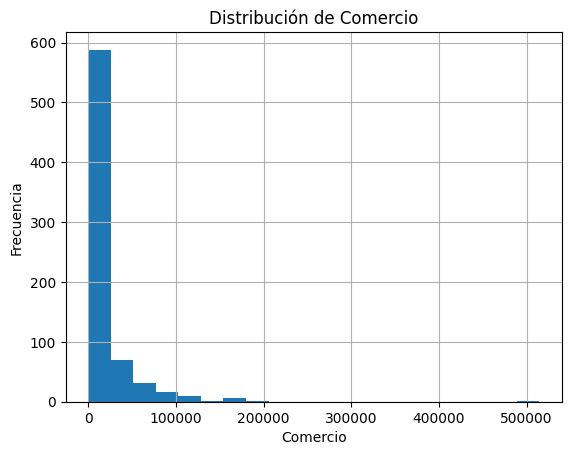

In [22]:
data['Comercio'].hist(bins=20)
plt.xlabel('Comercio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Comercio')
plt.show()


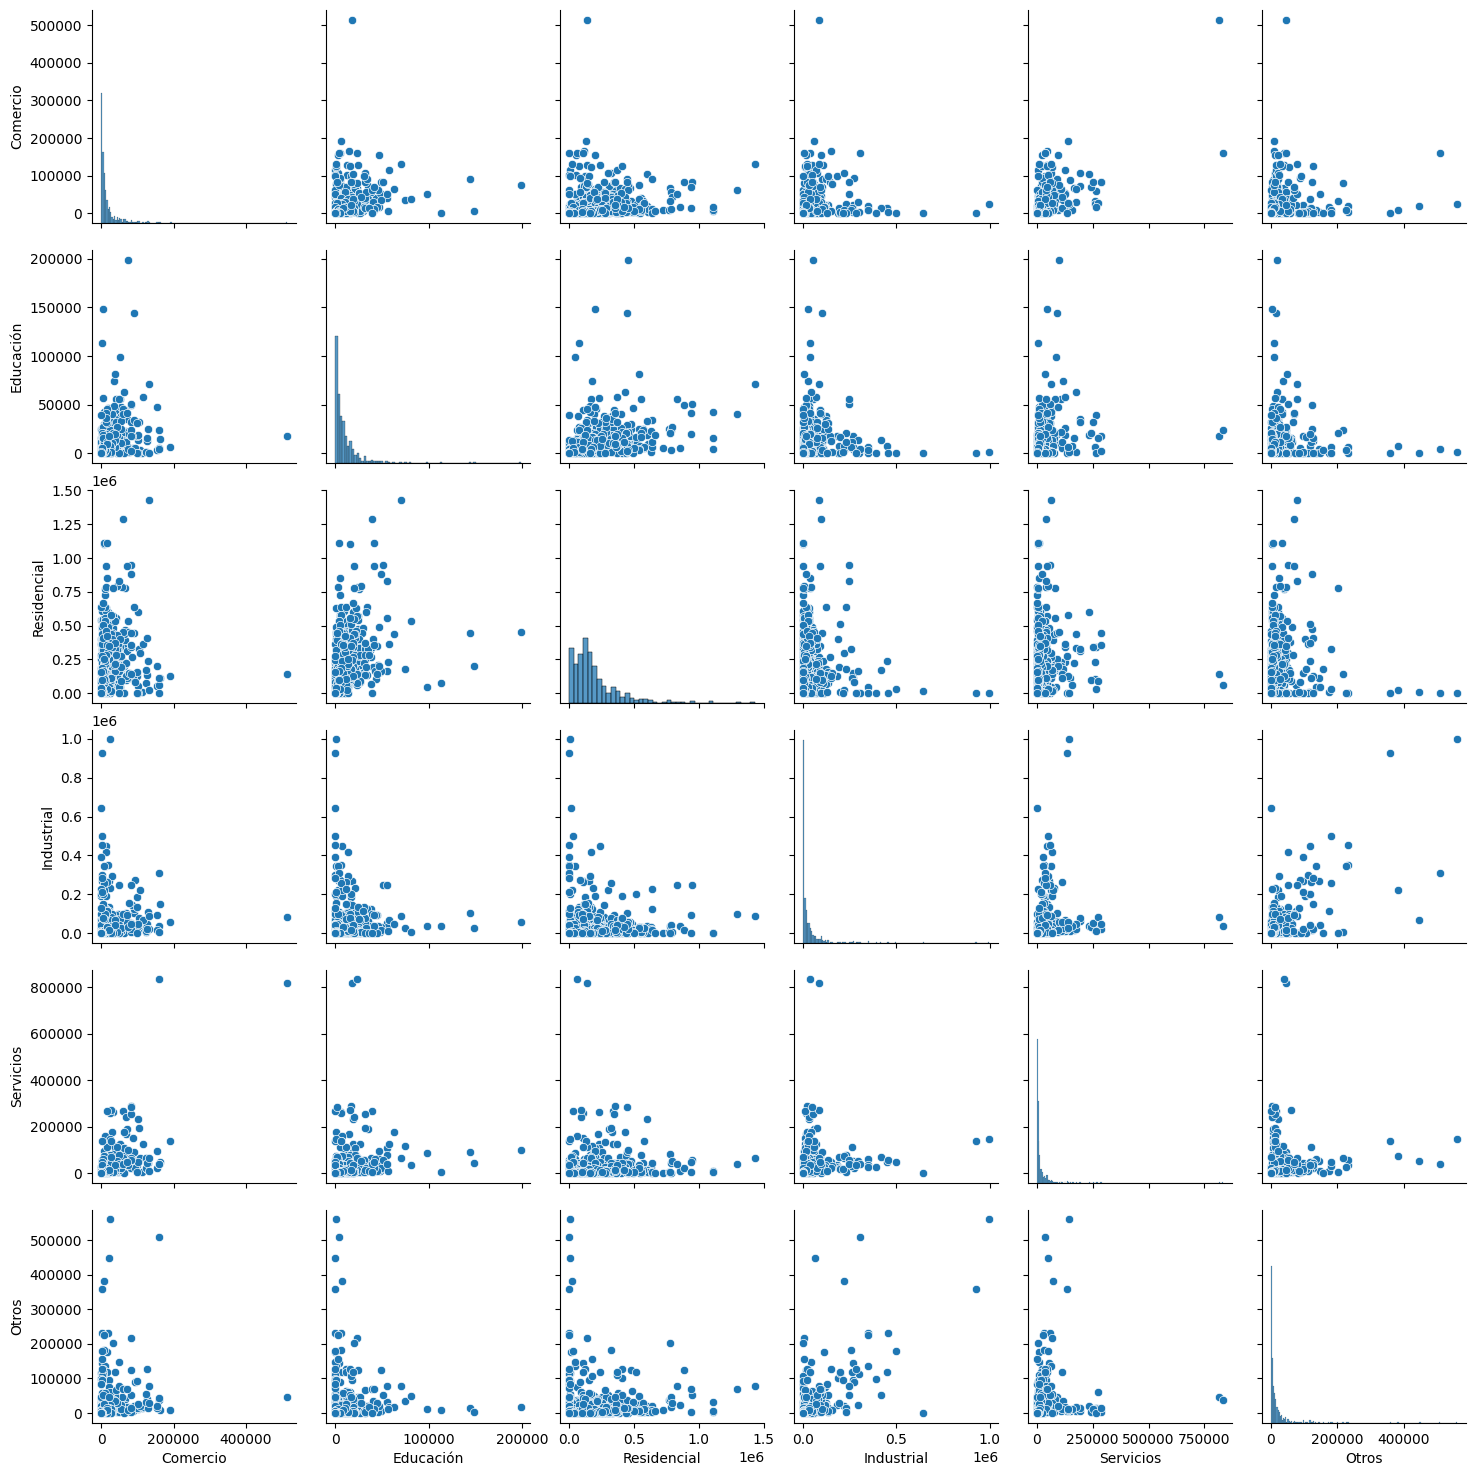

In [25]:
subset = data[['Comercio', 'Educación', 'Residencial', 'Industrial', 'Servicios', 'Otros']]
sns.pairplot(subset)
plt.show()


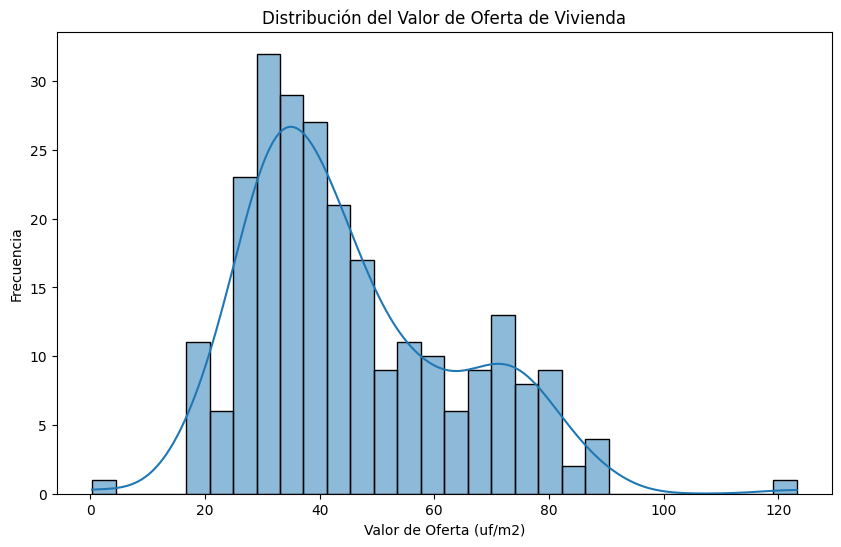

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Valor de oferta de vivienda (uf/m2)'], bins=30, kde=True)
plt.title('Distribución del Valor de Oferta de Vivienda')
plt.xlabel('Valor de Oferta (uf/m2)')
plt.ylabel('Frecuencia')
plt.show()


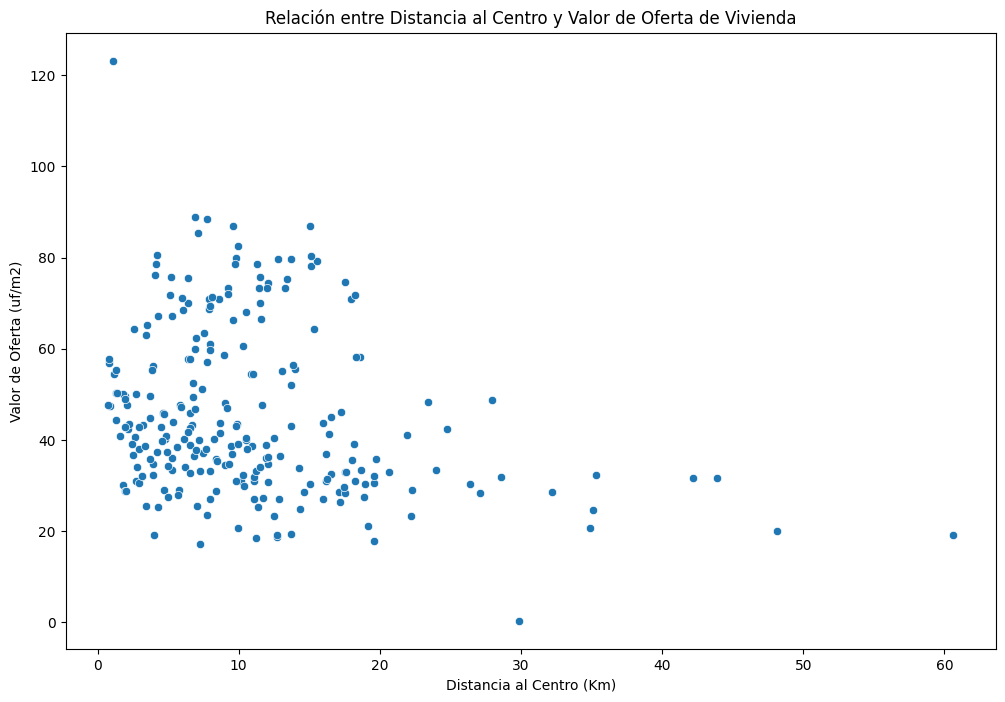

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Distancia al centro (Km)'], y=data['Valor de oferta de vivienda (uf/m2)'])
plt.title('Relación entre Distancia al Centro y Valor de Oferta de Vivienda')
plt.xlabel('Distancia al Centro (Km)')
plt.ylabel('Valor de Oferta (uf/m2)')
plt.show()


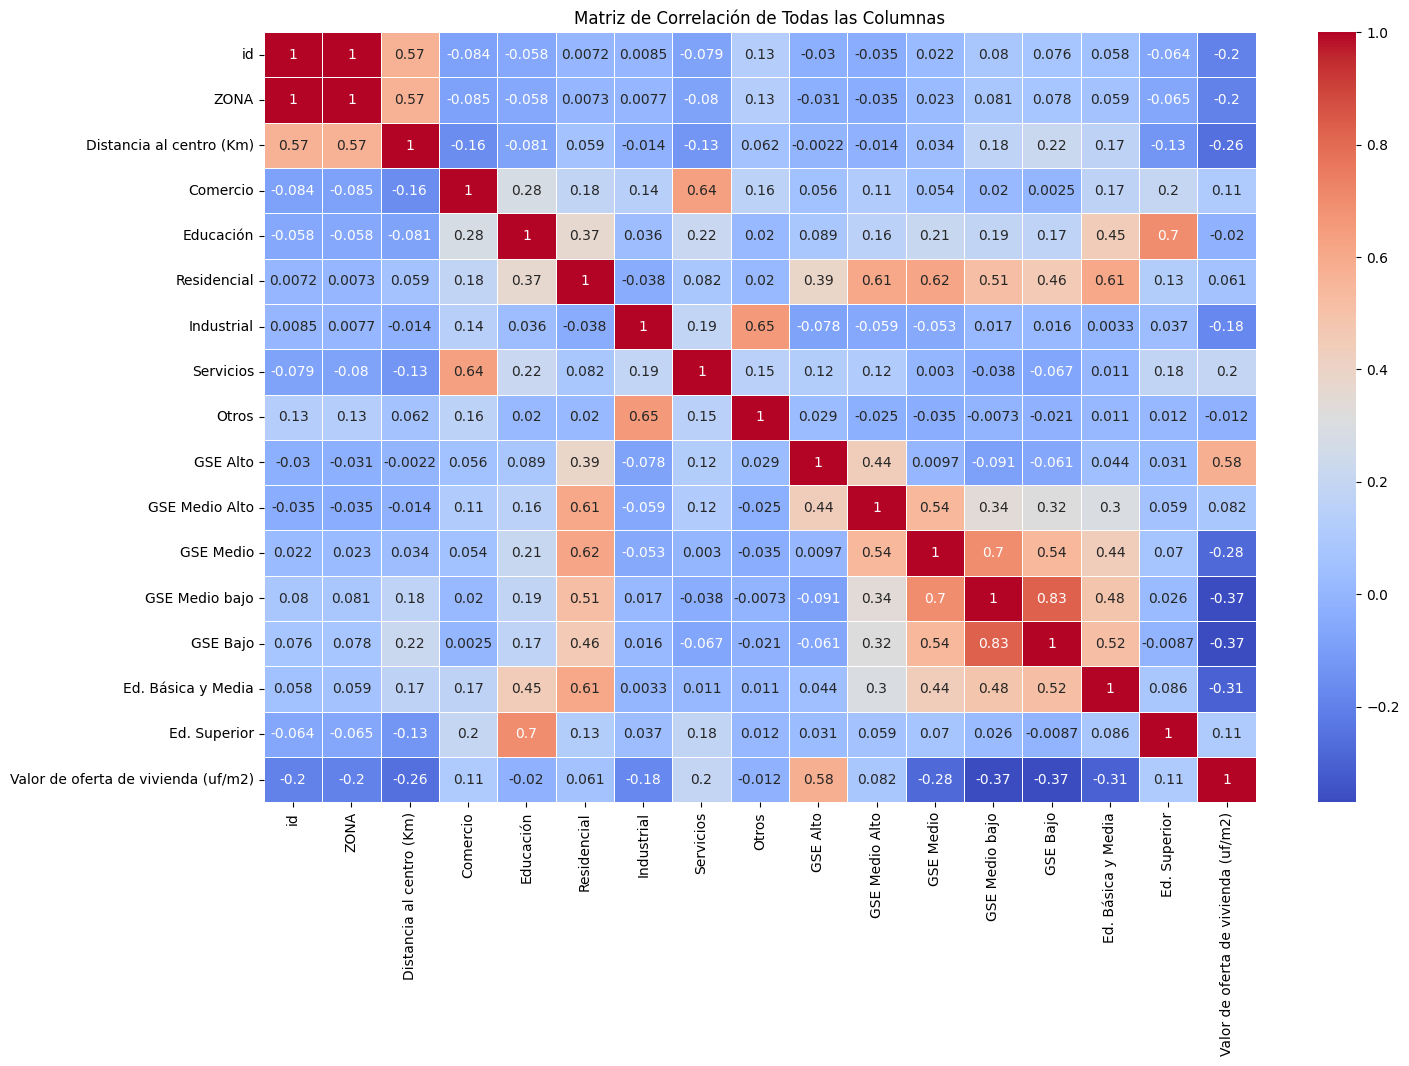

In [32]:
matriz = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Todas las Columnas')
plt.show()


In [15]:
data

,id,ZONA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,692,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN
738,739,695,17.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [13]:
# Verificar si hay valores NaN en X
print(X.isnull().sum())

# Verificar si hay valores infinitos en X
print((X == float('inf')).sum())
print((X == float('-inf')).sum())


const          0
Comercio      13
Industrial    13
Servicios     13
Otros         13
dtype: int64
const         0
Comercio      0
Industrial    0
Servicios     0
Otros         0
dtype: int64
const         0
Comercio      0
Industrial    0
Servicios     0
Otros         0
dtype: int64


In [16]:
data

,id,ZONA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,692,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN
738,739,695,17.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [17]:
columnasInteres = ['Comercio', 'Educación', 'Residencial', 'Industrial', 'Servicios', 'Otros']
data = data.dropna(subset=columnasInteres)

In [18]:
data

,id,ZONA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,735,691,40.81,22294.0,17516.0,349880.0,15080.0,13642.0,45482.0,0.0,0.0,0.0,0.0,193.0,5363.0,0.0,NaN
735,736,692,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN


In [32]:
X = data[['Comercio', 'Industrial', 'Servicios', 'Otros']]  
y = data['Residencial']  

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Residencial   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.553
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           5.80e-06
Time:                        21:15:11   Log-Likelihood:                -9827.9
No. Observations:                 727   AIC:                         1.967e+04
Df Residuals:                     722   BIC:                         1.969e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.762e+05   8053.241     21.880      0.0

In [23]:
data

,id,ZONA,Distancia al centro (Km),Comercio,Educación,Residencial,Industrial,Servicios,Otros,GSE Alto,GSE Medio Alto,GSE Medio,GSE Medio bajo,GSE Bajo,Ed. Básica y Media,Ed. Superior,Valor de oferta de vivienda (uf/m2)
0,1,1,4.78,12744.0,6333.0,78074.0,61992.0,10964.0,13686.0,0.0,28.0,787.0,282.0,483.0,1492.0,0.0,NaN
1,2,2,3.95,38325.0,37454.0,317556.0,48208.0,30940.0,20744.0,0.0,715.0,1422.0,2111.0,425.0,4316.0,3431.0,34.792910
2,3,3,3.90,46434.0,8041.0,220002.0,97680.0,15723.0,11143.0,0.0,379.0,625.0,612.0,1452.0,1594.0,0.0,32.258065
3,4,4,2.90,31768.0,10895.0,245378.0,51248.0,19715.0,24626.0,221.0,1272.0,450.0,323.0,139.0,1520.0,0.0,37.919361
4,5,5,4.15,11326.0,4685.0,59895.0,67859.0,6731.0,19666.0,0.0,87.0,664.0,72.0,15.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,735,691,40.81,22294.0,17516.0,349880.0,15080.0,13642.0,45482.0,0.0,0.0,0.0,0.0,193.0,5363.0,0.0,NaN
735,736,692,52.42,2670.0,4087.0,95963.0,2173.0,3528.0,663.0,0.0,0.0,0.0,0.0,0.0,1705.0,0.0,NaN
736,737,693,92.26,1516.0,5224.0,31346.0,428.0,4569.0,799.0,0.0,0.0,0.0,0.0,0.0,1211.0,0.0,NaN
737,738,694,76.80,521.0,1309.0,40831.0,356.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,967.0,0.0,NaN


In [30]:
import pandas as pd
import statsmodels.api as sm

# Lista de variables
independent_vars = ['Comercio', 'Residencial', 'Industrial', 'Servicios', 'Otros']
results = []

# Iterar a través de cada variable como variable dependiente
for dependent_var in independent_vars:
    # Obtener las variables independientes excluyendo la variable dependiente actual
    independent_vars_current = [var for var in independent_vars if var != dependent_var]
    
    # Preparar los datos
    X = data[independent_vars_current]  # Variables independientes
    y = data[dependent_var]  # Variable dependiente
    X = sm.add_constant(X)  # Agregar constante al modelo

    # Ajustar el modelo OLS
    model = sm.OLS(y, X).fit()
    
    # Almacenar los resultados
    results.append({
        'Dependent Variable': dependent_var,
        'Independent Variables': ', '.join(independent_vars_current),
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj,
        'F-statistic': model.fvalue,
        'P-value': model.f_pvalue
    })

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Imprimir el DataFrame
print(results_df)

# Opcional: Ordenar por el R-squared ajustado
best_models = results_df.sort_values(by='Adjusted R-squared', ascending=False)
print(best_models)


  Dependent Variable                         Independent Variables  R-squared  \
0           Comercio     Residencial, Industrial, Servicios, Otros   0.425926   
1        Residencial        Comercio, Industrial, Servicios, Otros   0.040162   
2         Industrial       Comercio, Residencial, Servicios, Otros   0.439716   
3          Servicios      Comercio, Residencial, Industrial, Otros   0.415880   
4              Otros  Comercio, Residencial, Industrial, Servicios   0.434142   

   Adjusted R-squared  F-statistic       P-value  
0            0.422746   133.919588  1.503020e-85  
1            0.034844     7.552586  5.804048e-06  
2            0.436612   141.657941  2.392361e-89  
3            0.412644   128.511805  7.702451e-83  
4            0.431007   138.484561  8.420232e-88  
  Dependent Variable                         Independent Variables  R-squared  \
2         Industrial       Comercio, Residencial, Servicios, Otros   0.439716   
4              Otros  Comercio, Residencial, 

In [33]:
results_df

,Dependent Variable,Independent Variables,R-squared,Adjusted R-squared,F-statistic,P-value
0,Comercio,"Residencial, Industrial, Servicios, Otros",0.425926,0.422746,133.919588,1.503020e-85
1,Residencial,"Comercio, Industrial, Servicios, Otros",0.040162,0.034844,7.552586,5.804048e-06
2,Industrial,"Comercio, Residencial, Servicios, Otros",0.439716,0.436612,141.657941,2.392361e-89
3,Servicios,"Comercio, Residencial, Industrial, Otros",0.415880,0.412644,128.511805,7.702451e-83
4,Otros,"Comercio, Residencial, Industrial, Servicios",0.434142,0.431007,138.484561,8.420232e-88


In [21]:
for combo, summary in results.items():
    print(f"Modelo: {combo}")
    print(summary)
    print("\n" + "="*50 + "\n")  


Modelo: ('Comercio',)
                            OLS Regression Results                            
Dep. Variable:            Residencial   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     24.89
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           7.60e-07
Time:                        20:50:42   Log-Likelihood:                -9830.6
No. Observations:                 727   AIC:                         1.967e+04
Df Residuals:                     725   BIC:                         1.967e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.731e+05   7674.4